In [2]:
import pandas as pd
import os 
import plotnine as p9
import warnings              #To remove warnings
warnings.filterwarnings("ignore")

curry_gl = pd.read_excel('stephen_curry_gamelog.xlsx')
curry_gl.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,GO,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Unnamed: 30
0,1,1.0,2018-10-16,30-216,GSW,NaN,OKC,W (+8),1,36:37,...,8.0,9.0,1.0,0.0,3.0,4.0,32.0,27.5,15.0,NaN
1,2,2.0,2018-10-19,30-219,GSW,@,UTA,W (+1),1,37:07,...,4.0,8.0,2.0,0.0,4.0,2.0,31.0,23.4,-3.0,NaN
2,3,3.0,2018-10-21,30-221,GSW,@,DEN,L (-2),1,39:13,...,4.0,6.0,0.0,0.0,2.0,4.0,30.0,19.7,3.0,NaN
3,4,4.0,2018-10-22,30-222,GSW,NaN,PHO,W (+20),1,29:40,...,4.0,8.0,2.0,0.0,3.0,0.0,29.0,26.2,18.0,NaN
4,5,5.0,2018-10-24,30-224,GSW,NaN,WAS,W (+22),1,31:35,...,4.0,3.0,0.0,1.0,2.0,1.0,51.0,41.8,19.0,NaN


In [62]:
GameW = curry_gl.loc[curry_gl.GO.str.startswith('W')]
GameL = curry_gl.loc[curry_gl.GO.str.startswith('L')]
GameW_CurryA = curry_gl.loc[(curry_gl.GO.str.startswith('W')) & (curry_gl.GS == 1)]
GameW_CurryA = GameW_CurryA[['GO','GS']]
GameW_CurryA['GO'] = 'W'
GameW_CurryA['GS'] = 'Active'
GameW_CurryA

,GO,GS
0,W,Active
1,W,Active
3,W,Active
4,W,Active
5,W,Active
6,W,Active
7,W,Active
8,W,Active
9,W,Active
10,W,Active


In [78]:
GameL_CurryA = curry_gl.loc[(curry_gl.GO.str.startswith('L')) & (curry_gl.GS == 1)]
GameL_CurryA = GameL_CurryA[['GO','GS']]
GameL_CurryA['GO'] = 'L'
GameL_CurryA['GS'] = 'Active'
GameL_CurryA

In [80]:
Game_CurryA = pd.concat([GameL_CurryA,GameW_CurryA])
Game_CurryA

,GO,GS
2,L,Active
11,L,Active
0,W,Active
1,W,Active
3,W,Active
4,W,Active
5,W,Active
6,W,Active
7,W,Active
8,W,Active


In [58]:
GameW_CurryI = curry_gl.loc[(curry_gl.GO.str.startswith('W')) & (curry_gl.GS == 'Inactive')]
GameW_CurryI = GameW_CurryI[['GO','GS']]
GameW_CurryI['GO'] = 'W'
GameW_CurryI

,GO,GS
12,W,Inactive
14,W,Inactive
19,W,Inactive
20,W,Inactive


In [61]:
GameL_CurryI = curry_gl.loc[(curry_gl.GO.str.startswith('L')) & (curry_gl.GS == 'Inactive')]
GameL_CurryI = GameL_CurryI[['GO','GS']]
GameL_CurryI['GO'] = 'L'
GameL_CurryI

,GO,GS
13,L,Inactive
15,L,Inactive
16,L,Inactive
17,L,Inactive
18,L,Inactive


In [90]:
Game_Curry = pd.concat([Game_CurryI, Game_CurryA])

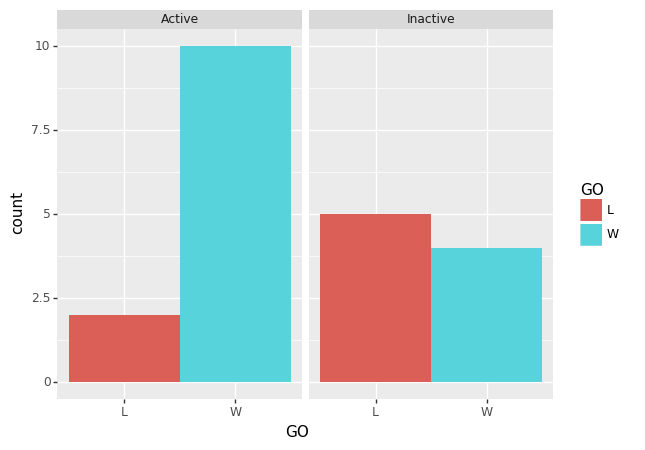

<ggplot: (8781849437290)>

In [93]:
p9.ggplot(Game_Curry) + p9.aes(x = 'GO' ,count = 'GS', fill = 'GO') + p9.geom_histogram() + p9.facet_wrap('~GS', ncol = 2)

In [75]:
from bs4 import BeautifulSoup, Comment
import requests
# Here, we're just importing both Beautiful Soup and the Requests library

page_link = 'https://www.basketball-reference.com/boxscores/201710170CLE.html'
# this is the url that we've already determined is safe and legal to scrape from.

page_response = requests.get(page_link, timeout=5)
# here, we fetch the content from the url, using the requests library

page_content = BeautifulSoup(page_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

In [2]:
##  pip install nba_api

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
warriors = [team for team in nba_teams if team['abbreviation'] == 'GSW'][0]
warriors_id = warriors['id']

from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriors_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]


games_1718 = games[games.SEASON_ID.str[-4:] == '2016']
games_1718

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
148,42016,1610612744,GSW,Golden State Warriors,0041600405,2017-06-12,GSW vs. CLE,W,241,129,...,0.821,13.0,29.0,42.0,27,8.0,2,13.0,24,9.0
149,42016,1610612744,GSW,Golden State Warriors,0041600404,2017-06-09,GSW @ CLE,L,241,116,...,0.750,16.0,24.0,40.0,26,5.0,6,12.0,27,-19.0
150,42016,1610612744,GSW,Golden State Warriors,0041600403,2017-06-07,GSW @ CLE,W,241,118,...,0.917,8.0,36.0,44.0,29,8.0,4,18.0,28,5.0
151,42016,1610612744,GSW,Golden State Warriors,0041600402,2017-06-04,GSW vs. CLE,W,240,132,...,0.917,10.0,43.0,53.0,34,5.0,7,20.0,19,19.0
152,42016,1610612744,GSW,Golden State Warriors,0041600401,2017-06-01,GSW vs. CLE,W,238,113,...,0.688,14.0,36.0,50.0,31,12.0,3,4.0,24,22.0
153,42016,1610612744,GSW,Golden State Warriors,0041600314,2017-05-22,GSW @ SAS,W,240,129,...,0.760,5.0,48.0,53.0,30,7.0,3,17.0,25,14.0
154,42016,1610612744,GSW,Golden State Warriors,0041600313,2017-05-20,GSW @ SAS,W,241,120,...,0.773,9.0,33.0,42.0,23,12.0,6,21.0,23,12.0
155,42016,1610612744,GSW,Golden State Warriors,0041600312,2017-05-16,GSW vs. SAS,W,242,136,...,0.947,6.0,34.0,40.0,39,16.0,5,16.0,19,36.0
156,42016,1610612744,GSW,Golden State Warriors,0041600311,2017-05-14,GSW vs. SAS,W,241,113,...,0.727,17.0,26.0,43.0,22,13.0,8,19.0,24,2.0
157,42016,1610612744,GSW,Golden State Warriors,0041600224,2017-05-08,GSW @ UTA,W,240,121,...,0.889,6.0,44.0,50.0,28,8.0,3,11.0,26,26.0
